In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, Activation, BatchNormalization,AveragePooling2D,GlobalAveragePooling2D

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import (threshold_otsu, threshold_niblack,
                             threshold_sauvola)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
img = cv2.imread('/content/drive/My Drive/Mini_project/Mini_project/left/act/p10_left_act_1.bmp',0)


True

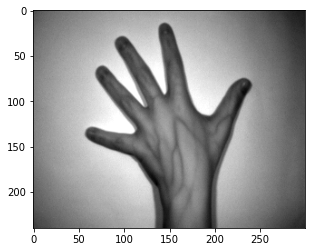

In [ ]:
import os
plt.imshow(img,cmap='gray')
cv2.imwrite(os.path.join('/content/drive/My Drive/Mini_project/Mini_project/left/ExperimentImages','img_1.jpg'),img)

In [ ]:
#cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
im.shape

(240, 300, 3)

In [ ]:
import sys
def roi(im):
  min_area=sys.maxsize-1
  r=im.shape[0]
  c=im.shape[1]
  ans = 0
  #print(im.shape)
  for i in range(r - 75):
    for j in range(c-60):
      #print(i)
      area=im[i:i+75,j:j+60]
      fin_area=0
      for k in range(area.shape[0]):
        for l in range(area.shape[1]):
          fin_area += area[k,l]
      # print(fin_area)
      if fin_area<min_area:
        min_area=fin_area
        ans1=i
        ans2=j
        ans = area
  return ans
def pre_process(img):
  g = cv2.blur(img , (5,5),0)
  g =  cv2.GaussianBlur(img,(5,5),0)
  # g = cv2.bilateralFilter(g,9,75,75)
  g = cv2.medianBlur(g, 3)
  #g = cv2.equalizeHist(g)
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  g = clahe.apply(g)
  # kernel = np.ones((5,5),np.uint8)
  # th3 = threshold_niblack(g, window_size=11)
  # g = g > th3
  g = cv2.adaptiveThreshold(g,1,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
  return g



In [ ]:
n = roi(img[75:200,75:200])
n.shape

(75, 60)

True

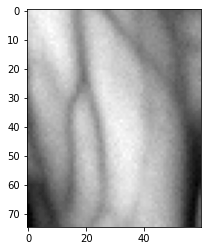

In [ ]:
# x =  cv2.GaussianBlur(img,(5,5),0)
# x = cv2.bilateralFilter(x,9,75,75)
# for i in range(0):
#   x = cv2.medianBlur(x,3)
plt.imshow(n,cmap = 'gray')
cv2.imwrite(os.path.join('/content/drive/My Drive/Mini_project/Mini_project/left/ExperimentImages','img_2.jpg'),n)

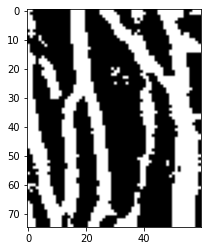

In [ ]:
x = pre_process(n)
for i in range(len(x)):
  for j in range(len(x[i])):
    if x[i,j]==1:
      x[i,j]=0
    else:
      x[i,j]=1


plt.imshow(x,cmap='gray')
cv2.imwrite(os.path.join('/content/drive/My Drive/Mini_project/Mini_project/left/ExperimentImages','img_3.jpg'),x)
from skimage.morphology import skeletonize, thin

skeleton = skeletonize(x)
thinned = thin(x)
thinned_partial = thin(x, max_iter=3)

True

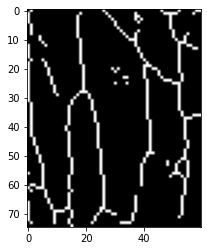

In [ ]:
plt.imshow(skeleton,cmap = 'gray')
cv2.imwrite(os.path.join('/content/drive/My Drive/Mini_project/Mini_project/left/ExperimentImages','img_4.jpg'),x)
# skeleton = cv2.blur(skeleton , (5,5),0)
# plt.imshow(skeleton,cmap='gray')

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [ ]:
import os
def load_images_from_folder(folder):
    images = list()
    file_names = list()
    for filename in os.listdir(folder):
        #print(filename)
        img = np.load(os.path.join(folder,filename),allow_pickle=True)
        if img is not None:
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            #img=np.expand_dims(img,axis=2)
            images.append(img)
            #print(img.shape)
            file_names.append(filename)
    return images,file_names

In [ ]:
images , file_names = load_images_from_folder('/content/drive/My Drive/Mini_project/Mini_project/pre_processed_images')

In [ ]:
#plt.imshow(images[0],cmap='gray')
def is_num(s):
  if s in ('1','2','3','4','5','6','7','8','9','0'):
    return True
  return False


In [ ]:
categories=[]
for j in range(len(file_names)):
  category=''
  i=0
  while i<=7:
    if is_num(file_names[j][i]):
      category=category+file_names[j][i]
    i+=1
  categories.append(int(category))

In [ ]:
for i in range(len(file_names)):
  file_names[i] = file_names[i][0:len(file_names[i])-4]

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(75,60,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))

In [ ]:
#x=np.array([images])
x=np.array(images)
dummy = []
for i in range(len(x)):
  #print(x[i].shape)
  for j in range(len(x[i])):
    for k in range(len(x[i][j])):
      if x[i][j][k] :
        x[i][j][k] = 1
      else:
        x[i][j][k] = 0
  d = np.expand_dims(x[i],axis=2)
  dummy.append(d)


In [ ]:
x=np.array(dummy)

In [ ]:
x.shape

(900, 75, 60, 1)

In [ ]:
y = list()
for i in categories:
  one_hot = np.zeros(100)
  one_hot[i-1] = 1
  y.append(one_hot)

In [ ]:
y=np.array(y)

In [ ]:
y.shape

(900, 100)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-5), 
              metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train , batch_size=32, epochs=28)

Epoch 1/28
810/810 [==============================] - 2s 2ms/step - loss: 4.6045 - accuracy: 0.0136
Epoch 2/28
810/810 [==============================] - 1s 1ms/step - loss: 4.6011 - accuracy: 0.0457
Epoch 3/28
810/810 [==============================] - 1s 1ms/step - loss: 4.5971 - accuracy: 0.0877
Epoch 4/28
810/810 [==============================] - 1s 1ms/step - loss: 4.5909 - accuracy: 0.1395
Epoch 5/28
810/810 [==============================] - 1s 1ms/step - loss: 4.5783 - accuracy: 0.1444
Epoch 6/28
810/810 [==============================] - 1s 1ms/step - loss: 4.5509 - accuracy: 0.1284
Epoch 7/28
810/810 [==============================] - 1s 1ms/step - loss: 4.4701 - accuracy: 0.1012
Epoch 8/28
810/810 [==============================] - 1s 1ms/step - loss: 4.2525 - accuracy: 0.0593
Epoch 9/28
810/810 [==============================] - 1s 1ms/step - loss: 4.1309 - accuracy: 0.0728
Epoch 10/28
810/810 [==============================] - 1s 1ms/step - loss: 3.9579 - accuracy: 0.0951

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
l=model.predict(x_test)
res=[]
act=[]
for i in range(l.shape[0]):
  res.append(np.argmax(l[i]))
  act.append(np.argmax(y_test[i]))
#len(res)




In [ ]:
score = accuracy_score(res,act)


In [ ]:
print('The Test accuracy  is  '+str(score*100))

The Test accuracy  is  80.0


In [ ]:
import pickle

In [ ]:
pickle.dump(model,open('/content/drive/My Drive/Mini_project/Temp_images/model.pkl','wb'))

In [ ]:
model=pickle.load(open('/content/drive/My Drive/Mini_project/Temp_images/model.pkl','rb'))

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

In [ ]:
multilabel_confusion_matrix(act,res)

array([[[89,  0],
        [ 0,  1]],

       [[87,  0],
        [ 2,  1]],

       [[84,  5],
        [ 1,  0]],

       [[89,  0],
        [ 0,  1]],

       [[89,  0],
        [ 0,  1]],

       [[82,  6],
        [ 1,  1]],

       [[89,  0],
        [ 1,  0]],

       [[87,  2],
        [ 0,  1]],

       [[88,  0],
        [ 1,  1]],

       [[88,  0],
        [ 2,  0]],

       [[89,  0],
        [ 1,  0]],

       [[87,  0],
        [ 3,  0]],

       [[87,  2],
        [ 0,  1]],

       [[89,  0],
        [ 1,  0]],

       [[82,  8],
        [ 0,  0]],

       [[89,  0],
        [ 0,  1]],

       [[89,  0],
        [ 1,  0]],

       [[88,  0],
        [ 2,  0]],

       [[89,  0],
        [ 1,  0]],

       [[89,  0],
        [ 1,  0]],

       [[89,  0],
        [ 1,  0]],

       [[87,  0],
        [ 3,  0]],

       [[89,  0],
        [ 1,  0]],

       [[89,  0],
        [ 1,  0]],

       [[88,  0],
        [ 2,  0]],

       [[89,  0],
        [ 1,  0]],

       [[88,